In [1]:
# Monte-Carlo playoff odds
# Generate my own playoff odds

# For now, I'm focusing on the mechanics of the simulation, and less so on the inputs (e.g., the projected team quality)
# So I'm using 538's win probabilities for each game, rather than computing my own

# I'm also using 538's results/schedule data, because it is so easy to use

import pandas as pd
import numpy as np
import seaborn as sns

from playoff_odds import *

%matplotlib inline

In [2]:
(played, remain) = get_games()
played.shape, remain.shape

((2016, 26), (414, 26))

# Exercise some functions that will be used in the simulation

In [3]:
compute_standings(played)

,W,L
LAD,92,42
HOU,87,48
NYM,85,50
ATL,84,51
NYY,81,54
STL,79,56
SEA,76,59
TBD,75,58
TOR,75,59
SDP,74,62


In [4]:


rand0 = get_randoms(0)
sim_rem_games(remain, rand0)

,W,L
LAD,21,7
CLE,19,10
HOU,18,9
SEA,18,9
SDP,17,9
NYM,17,10
CIN,17,13
TBD,17,12
SFG,16,13
MIL,16,12


In [5]:
cur_standings = compute_standings(played)
rem_standings = sim_rem_games(remain, rand0)
full_standings = cur_standings+rem_standings
full_standings

,W,L
ANA,69,93
ARI,70,92
ATL,98,64
BAL,83,79
BOS,80,82
CHC,70,92
CHW,83,79
CIN,70,92
CLE,88,74
COL,68,94


In [6]:
finish_one_season(cur_standings, remain, rand0)

,W,L,wpct,div,lg,rand,div_win,lg_rank
HOU,105,57,0.648148,ALW,A,0.077808,True,1
NYY,96,66,0.592593,ALE,A,0.491442,True,2
CLE,88,74,0.543210,ALC,A,0.719433,True,3
SEA,94,68,0.580247,ALW,A,0.052785,False,4
TBD,92,70,0.567901,ALE,A,0.904623,False,5
TOR,87,75,0.537037,ALE,A,0.445247,False,6
BAL,83,79,0.512346,ALE,A,0.478439,False,7
CHW,83,79,0.512346,ALC,A,0.275075,False,8
MIN,82,80,0.506173,ALC,A,0.589970,False,9
BOS,80,82,0.493827,ALE,A,0.590208,False,10


In [7]:
sim_results = sim_n_seasons(cur_standings, remain, 100)
sim_results

,,W,L,wpct,div,lg,rand,div_win,lg_rank
team,iter,,,,,,,,
HOU,0,105,57,0.648148,ALW,A,0.077808,True,1
NYY,0,96,66,0.592593,ALE,A,0.491442,True,2
CLE,0,88,74,0.543210,ALC,A,0.719433,True,3
SEA,0,94,68,0.580247,ALW,A,0.052785,False,4
TBD,0,92,70,0.567901,ALE,A,0.904623,False,5
...,...,...,...,...,...,...,...,...,...
FLA,99,69,93,0.425926,NLE,N,0.205477,False,11
COL,99,65,97,0.401235,NLW,N,0.568564,False,12
PIT,99,61,101,0.376543,NLC,N,0.853643,False,13


In [8]:
# Count the number of div/wc/playoff appearances by team from a set of results
summarize_sim_results(sim_results)

,mean,max,min,1,2,3,4,5,6,div_wins,playoffs,champ_shares,home_game
team,,,,,,,,,,,,,
ANA,72.38,78,67,0,0,0,0,0,0,0,0,0.000,0.00
ARI,76.36,82,70,0,0,0,0,0,0,0,0,0.000,0.00
ATL,100.08,106,94,0,33,0,67,0,0,33,100,8.815,100.00
BAL,83.08,90,77,0,0,0,0,0,5,0,5,0.275,2.20
BOS,79.43,85,74,0,0,0,0,0,1,0,1,0.055,0.44
CHC,69.84,76,64,0,0,0,0,0,0,0,0,0.000,0.00
CHW,83.22,89,77,0,0,26,0,0,2,26,28,1.930,26.88
CIN,66.98,75,60,0,0,0,0,0,0,0,0,0.000,0.00
CLE,85.02,91,77,0,0,58,0,0,1,58,59,4.115,58.44


In [9]:
weights

{'champ_shares': {1: 0.125, 2: 0.125, 3: 0.07, 4: 0.07, 5: 0.055, 6: 0.055},
 'home_game': {1: 1, 2: 1, 3: 1, 4: 1, 5: 0.44, 6: 0.44}}

In [10]:
sim_results.groupby('iter')['W'].max().median()

110.0

In [11]:
summary = summarize_sim_results(sim_results)
print(summary.sort_values('champ_shares', ascending=False).to_string())

        mean  max  min    1   2   3   4   5   6  div_wins  playoffs  champ_shares  home_game
team                                                                                        
HOU   103.52  109   96   98   2   0   0   0   0       100       100        12.500     100.00
LAD   110.33  115  106  100   0   0   0   0   0       100       100        12.500     100.00
NYY    97.07  103   90    2  94   0   1   3   0        96       100        12.235      98.32
NYM   101.81  107   97    0  67   0  33   0   0        67       100        10.685     100.00
ATL   100.08  106   94    0  33   0  67   0   0        33       100         8.815     100.00
STL    94.59   99   88    0   0  98   0   1   1        98       100         6.970      98.88
SEA    91.90   98   82    0   0   0  52  33  14         0        99         6.225      72.68
TOR    90.32   95   84    0   3   0  26  33  37         3        99         6.045      59.80
TBD    89.64   97   83    0   1   0  21  31  40         1        93   

In [12]:
tms = ('SDP', 'PHI')
sim_results.query('lg_rank==4 and team in @tms')['W'].groupby('team').mean()

Series([], Name: W, dtype: float64)

In [13]:

phils4 = sim_results.query('lg_rank==4 and team=="PHI"').reset_index()['iter'].values
sim_results.query('iter in @phils4 and div=="NLE" and div_win').reset_index()['team'].value_counts()


Series([], Name: team, dtype: int64)

In [14]:
tms = ('SDP', 'PHI')
sim_results.query('W>=94 and team in @tms').reset_index()['team'].value_counts()

Series([], Name: team, dtype: int64)

In [15]:
os_playoffs = sim_results.query('team=="BAL" and lg_rank<=6').reset_index()['iter'].values
sim_results.query('iter in @os_playoffs and lg=="A" and lg_rank==7').reset_index()['team'].value_counts()

TBD    3
TOR    1
CHW    1
Name: team, dtype: int64

In [16]:
tms= ['SEA', 'NYY']
sim_results.query("team in @tms")['lg_rank'].unstack().T.product(axis=1).value_counts()

8     48
10    32
12    13
20     3
4      2
30     1
16     1
dtype: int64

In [17]:
# How many games does each team win in each seeding?
sim_results.query('lg_rank <= 6').groupby(['team', 'lg_rank'])['W'].mean().unstack()

lg_rank,1,2,3,4,5,6
team,,,,,,
ATL,NaN,102.151515,NaN,99.059701,NaN,NaN
BAL,NaN,NaN,NaN,NaN,NaN,87.400000
BOS,NaN,NaN,NaN,NaN,NaN,83.000000
CHW,NaN,NaN,85.384615,NaN,NaN,86.500000
CLE,NaN,NaN,86.482759,NaN,NaN,87.000000
HOU,103.632653,98.000000,NaN,NaN,NaN,NaN
LAD,110.330000,NaN,NaN,NaN,NaN,NaN
MIL,NaN,NaN,90.000000,NaN,88.772727,86.600000
MIN,NaN,NaN,86.312500,NaN,NaN,NaN


In [18]:
remain.tail(10)


,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
404,2022-09-06,2022,0,NaN,COL,MIL,1454.332165,1515.626930,0.446534,0.553466,...,46.959022,57.274584,-14.817605,16.774696,0.383438,0.616562,NaN,NaN,NaN,NaN
405,2022-09-06,2022,0,NaN,KCR,CLE,1456.656818,1510.563595,0.457067,0.542933,...,46.261317,60.174261,-9.978581,32.041291,0.402345,0.597655,NaN,NaN,NaN,NaN
406,2022-09-06,2022,0,NaN,HOU,TEX,1580.170158,1469.047380,0.685212,0.314788,...,58.264302,49.836736,6.927441,-3.293093,0.686206,0.313794,NaN,NaN,NaN,NaN
407,2022-09-06,2022,0,NaN,STL,WSN,1552.224657,1442.156615,0.683901,0.316099,...,50.443530,47.223035,-8.455611,6.581118,0.639728,0.360272,NaN,NaN,NaN,NaN
408,2022-09-06,2022,0,NaN,CHC,CIN,1462.103655,1469.471684,0.523917,0.476083,...,50.576665,48.971900,0.997523,-4.609393,0.534801,0.465199,NaN,NaN,NaN,NaN
409,2022-09-06,2022,0,NaN,NYY,MIN,1555.804596,1503.161716,0.608543,0.391457,...,60.046615,53.007209,19.937259,7.120633,0.630856,0.369144,NaN,NaN,NaN,NaN
410,2022-09-06,2022,0,NaN,BAL,TOR,1505.146266,1539.830047,0.484630,0.515370,...,50.463074,47.854467,-3.752287,-23.145871,0.483652,0.516348,NaN,NaN,NaN,NaN
411,2022-09-06,2022,0,NaN,PHI,FLA,1521.202073,1454.287326,0.627930,0.372070,...,59.797332,51.417775,23.302133,-9.428363,0.663523,0.336477,NaN,NaN,NaN,NaN
412,2022-09-06,2022,0,NaN,TBD,BOS,1552.855041,1498.234307,0.611252,0.388748,...,47.400000,51.296494,2.750912,-1.613766,0.583588,0.416412,NaN,NaN,NaN,NaN
413,2022-09-06,2022,0,NaN,PIT,NYM,1419.311501,1550.547834,0.350395,0.649605,...,47.783377,51.711977,-0.244601,-16.399350,0.369578,0.630422,NaN,NaN,NaN,NaN


In [19]:
sim_both_ways(cur_standings, remain.index.values[-1], 100, remain)

team
ANA    0.000
ARI    0.000
ATL    0.880
BAL    0.000
BOS    0.000
CHC    0.000
CHW    0.000
CIN    0.000
CLE    0.000
COL    0.000
DET    0.000
FLA    0.000
HOU    0.000
KCR    0.000
LAD    0.000
MIL    0.000
MIN    0.000
NYM   -0.935
NYY    0.000
OAK    0.000
PHI    0.000
PIT    0.000
SDP    0.000
SEA    0.000
SFG    0.000
STL    0.055
TBD    0.000
TEX    0.000
TOR    0.000
WSN    0.000
Name: 413, dtype: float64

In [20]:
next_dt = remain['date'].min()
game_ids = remain.query('date == @next_dt').index.values
game_ids

array([399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411,
       412, 413])

In [21]:
results = pd.DataFrame()
for i in range(2, 3):
    num_iterations = 10 ** i
    print(f'Starting {num_iterations} iterations')
    results = pd.concat([sim_both_ways(cur_standings, game_id, num_iterations, remain) for game_id in game_ids], axis=1)
    print(results)

Starting 100 iterations
      399    400    401   402  403    404    405  406    407  408    409  \
team                                                                       
ANA   0.0  0.000  0.000  0.00  0.0  0.000  0.000  0.0  0.000  0.0  0.000   
ARI   0.0  0.000  0.000  0.00  0.0  0.000  0.000  0.0  0.000  0.0  0.000   
ATL   0.0  0.000  0.000 -0.77  0.0  0.000  0.000  0.0  0.000  0.0  0.000   
BAL   0.0  0.000  0.000  0.00  0.0  0.000  0.000  0.0  0.000  0.0  0.000   
BOS   0.0  0.000  0.000  0.00  0.0  0.000  0.000  0.0  0.000  0.0  0.055   
CHC   0.0  0.000  0.000  0.00  0.0  0.000  0.000  0.0  0.000  0.0  0.000   
CHW   0.0 -0.685  0.000  0.00  0.0  0.000  0.420  0.0  0.000  0.0  0.210   
CIN   0.0  0.000  0.000  0.00  0.0  0.000  0.000  0.0  0.000  0.0  0.000   
CLE   0.0  0.365  0.000  0.00  0.0  0.000 -0.895  0.0  0.000  0.0  0.365   
COL   0.0  0.000  0.000  0.00  0.0  0.000  0.000  0.0  0.000  0.0  0.000   
DET   0.0  0.000  0.000  0.00  0.0  0.000  0.000  0.0  0.000  0.

In [22]:
game_descs = remain.apply(lambda x: f'{x.team2}\n@{x.team1}', axis=1)
game_descs.to_dict()

{0: 'COL\n@LAD',
 1: 'DET\n@SEA',
 2: 'SFG\n@SDP',
 3: 'WSN\n@NYM',
 4: 'ARI\n@MIL',
 5: 'PHI\n@HOU',
 6: 'ATL\n@FLA',
 7: 'KCR\n@CLE',
 8: 'CHC\n@CIN',
 9: 'MIN\n@CHW',
 10: 'TBD\n@BOS',
 11: 'NYY\n@TEX',
 12: 'STL\n@PIT',
 13: 'TOR\n@BAL',
 14: 'ANA\n@OAK',
 15: 'COL\n@LAD',
 16: 'DET\n@SEA',
 17: 'SFG\n@SDP',
 18: 'ANA\n@OAK',
 19: 'PHI\n@HOU',
 20: 'MIN\n@CHW',
 21: 'NYY\n@TEX',
 22: 'ARI\n@MIL',
 23: 'WSN\n@NYM',
 24: 'TBD\n@BOS',
 25: 'TOR\n@BAL',
 26: 'ATL\n@FLA',
 27: 'CHC\n@CIN',
 28: 'STL\n@PIT',
 29: 'DET\n@SEA',
 30: 'KCR\n@CLE',
 31: 'NYY\n@TEX',
 32: 'COL\n@LAD',
 33: 'DET\n@SEA',
 34: 'SFG\n@SDP',
 35: 'ANA\n@OAK',
 36: 'PHI\n@HOU',
 37: 'MIN\n@CHW',
 38: 'ARI\n@MIL',
 39: 'WSN\n@NYM',
 40: 'TBD\n@BOS',
 41: 'NYY\n@TEX',
 42: 'TOR\n@BAL',
 43: 'ATL\n@FLA',
 44: 'CHC\n@CIN',
 45: 'STL\n@PIT',
 46: 'KCR\n@CLE',
 47: 'OAK\n@SEA',
 48: 'CHW\n@SDP',
 49: 'COL\n@LAD',
 50: 'TEX\n@ANA',
 51: 'ARI\n@SFG',
 52: 'CIN\n@CHC',
 53: 'PIT\n@STL',
 54: 'FLA\n@MIL',
 55: 'TBD\n@HOU',
 5

In [23]:
for_graphing = results/(num_iterations/100)
for_graphing = for_graphing.rename(columns=game_descs.to_dict())
for_graphing


,SFG\n@LAD,CHW\n@SEA,ARI\n@SDP,ATL\n@OAK,DET\n@ANA,MIL\n@COL,CLE\n@KCR,TEX\n@HOU,WSN\n@STL,CIN\n@CHC,MIN\n@NYY,TOR\n@BAL,FLA\n@PHI,BOS\n@TBD,NYM\n@PIT
team,,,,,,,,,,,,,,,
ANA,0.0,0.000,0.000,0.00,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.00,0.000,0.000
ARI,0.0,0.000,0.000,0.00,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.00,0.000,0.000
ATL,0.0,0.000,0.000,-0.77,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.00,0.000,0.880
BAL,0.0,0.000,0.000,0.00,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.235,0.00,-0.055,0.000
BOS,0.0,0.000,0.000,0.00,0.0,0.000,0.000,0.0,0.000,0.0,0.055,0.000,0.00,0.000,0.000
CHC,0.0,0.000,0.000,0.00,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.00,0.000,0.000
CHW,0.0,-0.685,0.000,0.00,0.0,0.000,0.420,0.0,0.000,0.0,0.210,0.055,0.00,0.000,0.000
CIN,0.0,0.000,0.000,0.00,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.00,0.000,0.000
CLE,0.0,0.365,0.000,0.00,0.0,0.000,-0.895,0.0,0.000,0.0,0.365,0.000,0.00,0.000,0.000


In [24]:
teamwise_leverage = for_graphing.abs().sum(axis=1).sort_values(ascending=False)
teamwise_leverage


team
NYM    1.760
ATL    1.650
CLE    1.625
MIL    1.380
CHW    1.370
MIN    1.315
SDP    1.210
PHI    1.100
TOR    0.695
NYY    0.375
TBD    0.330
SEA    0.305
BAL    0.290
STL    0.170
SFG    0.110
BOS    0.055
OAK    0.000
PIT    0.000
TEX    0.000
ANA    0.000
ARI    0.000
LAD    0.000
KCR    0.000
HOU    0.000
FLA    0.000
DET    0.000
COL    0.000
CIN    0.000
CHC    0.000
WSN    0.000
dtype: float64

<AxesSubplot:ylabel='team'>

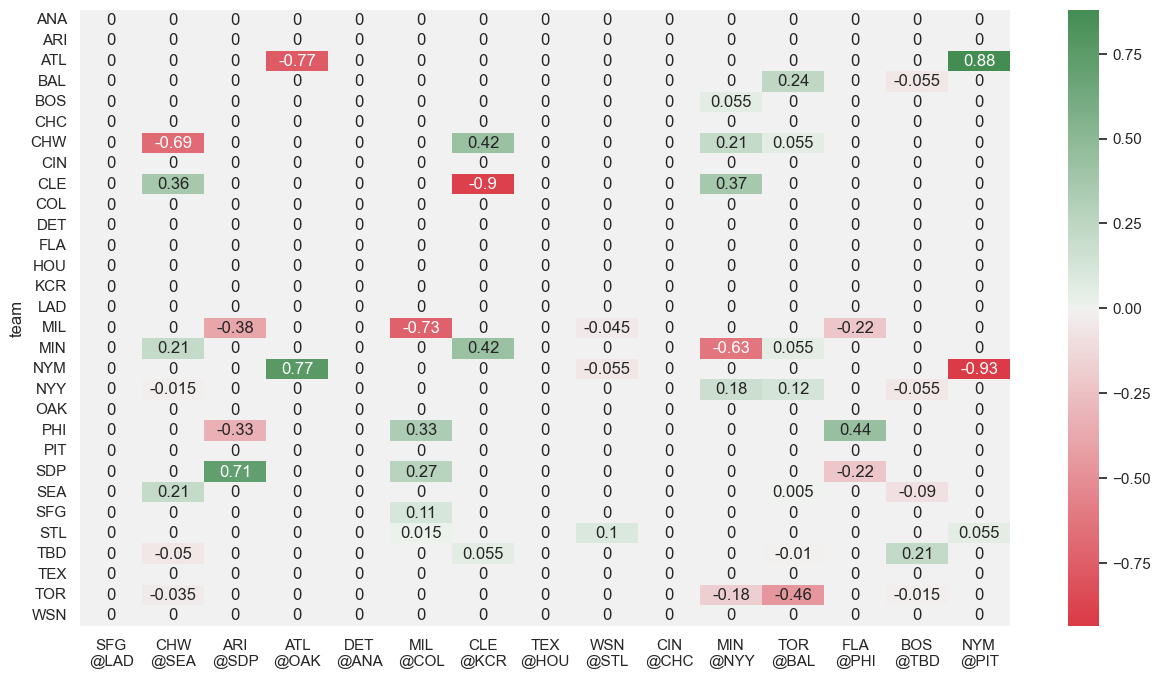

In [25]:
sns.set(rc = {'figure.figsize':(15,8)})
cmap = sns.diverging_palette(10, 133, as_cmap=True)
sns.heatmap(for_graphing, cmap=cmap, annot=True, center=0)

In [26]:
(abs(results)).sum(axis=0).sort_values()

399    0.00
403    0.00
406    0.00
408    0.00
407    0.20
412    0.43
411    0.88
410    0.95
401    1.43
404    1.46
402    1.54
400    1.57
409    1.62
405    1.79
413    1.87
dtype: float64

In [27]:
results.sum(axis=1).sum()

1.887379141862766e-15

In [28]:
gamewise_leverage = for_graphing.abs().sum(axis=0).sort_values(ascending=False)
gamewise_leverage

NYM\n@PIT    1.87
CLE\n@KCR    1.79
MIN\n@NYY    1.62
CHW\n@SEA    1.57
ATL\n@OAK    1.54
MIL\n@COL    1.46
ARI\n@SDP    1.43
TOR\n@BAL    0.95
FLA\n@PHI    0.88
BOS\n@TBD    0.43
WSN\n@STL    0.20
SFG\n@LAD    0.00
DET\n@ANA    0.00
TEX\n@HOU    0.00
CIN\n@CHC    0.00
dtype: float64